In [1]:
import pandas as pd
import MultiContagion as mc
import igraph
import random
import numpy as np
from matplotlib import pylab as plt
import copy
%matplotlib inline

In [2]:
pd.read_stata("CPIS_9countries.dta");

In [3]:
pd.read_stata("CDIS_9countries.dta");

* I_A_D_TT - is Assets, Debt Securities
* I_A_E_TT - is Assets, Equity Securities
* I_A_T_TT - is Assets, Total Securities
* I_L_D_TT - is Liabilities, Debt Securities
* I_L_E_TT - is Liabilities, Equity Securities
* I_L_T_TT - is Liabilities, Total Securities
* Asset side is reported by most countries, liability side reporting is voluntary.

## Mapping CPIS and obtaining basic measurements

In [4]:
df_cp = pd.read_stata("CPIS_9countries.dta")

**CPIS debt **

In [5]:
edges_cp_debt, weight_cp_debt = mc.make_edge_list(df_cp["country"], df_cp["counterpart"], df_cp["I_A_D_T_T_BP6_USD"])
G_cp_debt = mc.make_graph_from_edge(edges_cp_debt, weight_cp_debt)
max_weight = max(G_cp_debt.es["weight"])
E_width_cp = [0.2 + 5*G_cp_debt.es["weight"][i]/max_weight for i in range(len(G_cp_debt.es["weight"]) )]

In [6]:
country_name = copy.deepcopy(G_cp_debt.vs["name"])

In [7]:
G_cp_debt.strength(weights=G_cp_debt.es["weight"]);
G_cp_debt.vs["name"];

**CPIS equity ** 

In [8]:
edges_cp_equity, weight_cp_equity = mc.make_edge_list(df_cp["country"], df_cp["counterpart"], df_cp["I_A_E_T_T_BP6_USD"])
G_cp_equity = mc.make_graph_from_edge(edges_cp_equity, weight_cp_equity)
max_weight = max(G_cp_equity.es["weight"])
E_width_cp = [0.2 + 5*G_cp_equity.es["weight"][i]/max_weight for i in range(len(G_cp_equity.es["weight"]) )]

**Make list of graphs **

In [9]:
G_cpis = [G_cp_debt, G_cp_equity]

## Contagion on Multi CPIS

In [10]:
ltm_cont_time_mean, ltm_cont_time_std = mc.make_several_multi_contagion_list([G_cp_debt, G_cp_equity])

In [11]:
si_cont_time_mean, si_cont_time_std = mc.make_several_multi_contagion_list([G_cp_debt, G_cp_equity], contagion_function= mc.SI_multi_contagion_weighted, parameters=[0.25, 0.5, 0.75])

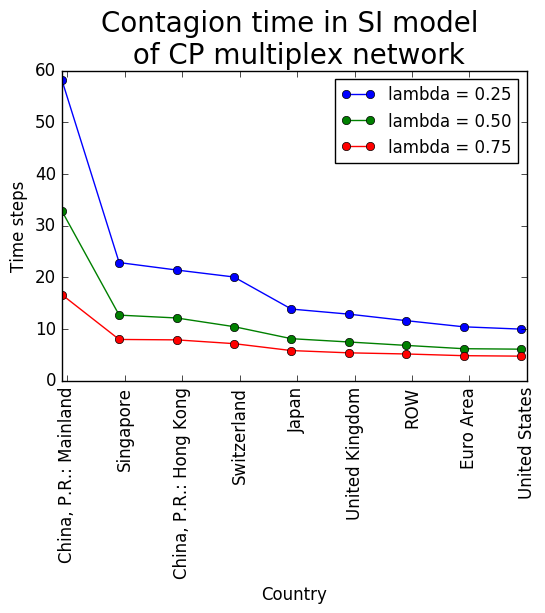

In [12]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(si_cont_time_mean[0], country_name))]))
SI_cont_time_mean_list_ordered2 = list(reversed([x for (y, x) in sorted(zip(si_cont_time_mean[0], si_cont_time_mean[1]))]))
SI_cont_time_mean_list_ordered3 = list(reversed([x for (y, x) in sorted(zip(si_cont_time_mean[0], si_cont_time_mean[2]))]))
SI_cont_time_mean_list_ordered1 = list(reversed(sorted(si_cont_time_mean[0])))
ax1.plot(SI_cont_time_mean_list_ordered1, "o-", label = "lambda = 0.25")
ax1.plot(SI_cont_time_mean_list_ordered2, "o-", label = "lambda = 0.50")
ax1.plot(SI_cont_time_mean_list_ordered3, "o-", label = "lambda = 0.75")
plt.title("Contagion time in SI model \n of CP multiplex network", fontsize = 20)
plt.xticks(0.1 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Time steps", fontsize = 12)
plt.legend()
plt.savefig("SI_multi_cont-time_cp.png",bbox_inches='tight')
plt.show()

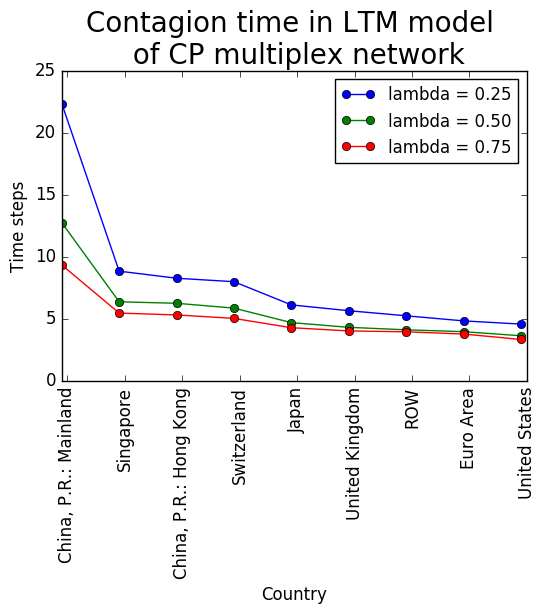

In [13]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(ltm_cont_time_mean[0], country_name))]))
LTM_cont_time_mean_list_ordered2 = list(reversed([x for (y, x) in sorted(zip(ltm_cont_time_mean[0], ltm_cont_time_mean[1]))]))
LTM_cont_time_mean_list_ordered3 = list(reversed([x for (y, x) in sorted(zip(ltm_cont_time_mean[0], ltm_cont_time_mean[2]))]))
LTM_cont_time_mean_list_ordered1 = list(reversed(sorted(ltm_cont_time_mean[0])))
ax1.plot(LTM_cont_time_mean_list_ordered1, "o-", label = "lambda = 0.25")
ax1.plot(LTM_cont_time_mean_list_ordered2, "o-", label = "lambda = 0.50")
ax1.plot(LTM_cont_time_mean_list_ordered3, "o-", label = "lambda = 0.75")
plt.title("Contagion time in LTM model \n of CP multiplex network", fontsize = 20)
plt.xticks(0.1 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Time steps", fontsize = 12)
plt.legend()
plt.savefig("LTM_multi_cont-time_cp.png",bbox_inches='tight')
plt.show()